Data preprocessing

In [6]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv(r'C:\Users\MOHITH\OneDrive\Desktop\STUDY MATERIALS\ML\Machine Learning A-Z (Codes and Datasets)\Part 9 - Dimensionality Reduction\Section 43 - Principal Component Analysis (PCA)\Wine.csv')
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


Splitting data

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

Feature scaling

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

LDA

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X_train = lda.fit_transform(X_train,y_train)
X_test = lda.transform(X_test)

Model training

In [13]:
from sklearn.linear_model import LogisticRegression
regr = LogisticRegression(random_state=0)
regr.fit(X_train,y_train)

LogisticRegression(random_state=0)

Perfomance

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = regr.predict(X_test)
cm = confusion_matrix(y_pred, y_test)
print(cm)
accuracy_score(y_pred, y_test)

[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]


1.0

testset visualisation

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


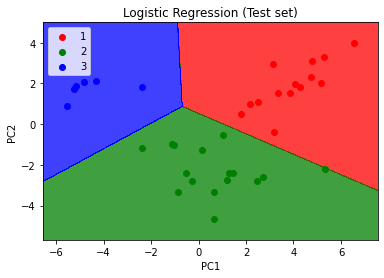

In [15]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, regr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()